<a href="https://colab.research.google.com/github/mansimar20/IMAGE-RECOGNITION/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip  install -q kaggle

In [81]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"kaurmansimar","key":"ba0eba56d8b8e1d0fd7cb7f378c2ef42"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape} , Test shape: {x_test.shape}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (scale them between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to match CNN input (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"X_train reshaped: {X_train.shape}")


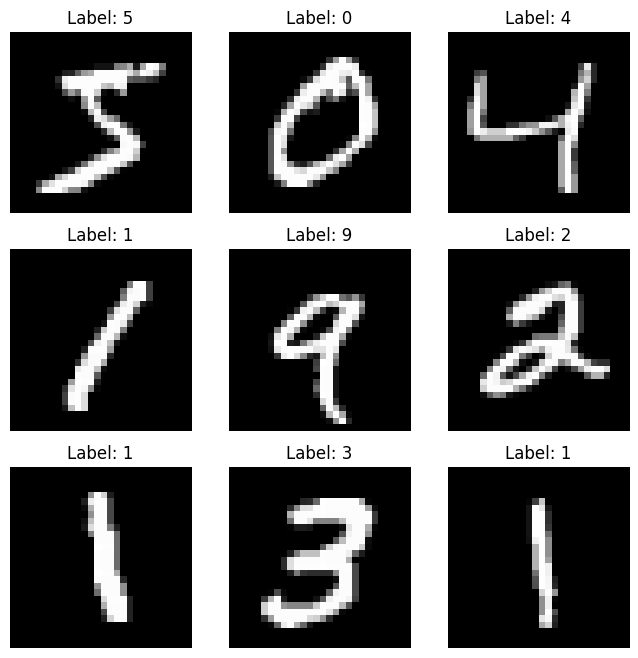

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [ ]:
(x_train_c10 , y_train_c10) , (x_test_c10 , y_test_c10) = tf.keras.datasets.cifar10.load_data()

X_train = x_train_c10 / 255.0
X_test = x_test_c10 / 255.0

print(f"CIFAR-10 train shape: {X_train.shape}")
print(f"CIFAR-10 test shape: {X_test.shape}")


CIFAR-10 train shape: (50000, 32, 32, 3)
CIFAR-10 test shape: (10000, 32, 32, 3)


In [ ]:
tf.keras.datasets.cifar10.load_data()


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),  # Changed 1 → 3
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 58ms/step - accuracy: 0.1085 - loss: 2.3030 - val_accuracy: 0.1115 - val_loss: 2.3013
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.1164 - loss: 2.3008 - val_accuracy: 0.1115 - val_loss: 2.3013
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 63ms/step - accuracy: 0.1126 - loss: 2.3016 - val_accuracy: 0.1123 - val_loss: 2.3014
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.1143 - loss: 2.3009 - val_accuracy: 0.1115 - val_loss: 2.3014
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.1141 - loss: 2.3004 - val_accuracy: 0.1125 - val_loss: 2.3018


<function matplotlib.pyplot.show(close=None, block=None)>

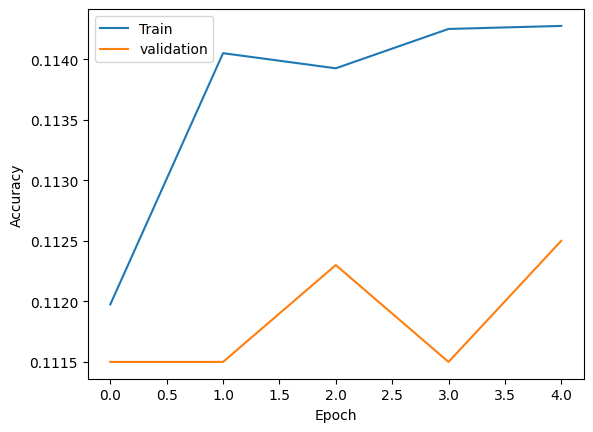

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [ ]:
test_loss,test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: {test_acc:.4f}")
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1157 - loss: 2.3027
Test accuracy: {test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = cifar10.load_data()

# Normalize pixel values to 0-1
X_train_c10 = X_train_c10.astype('float32') / 255.0
X_test_c10 = X_test_c10.astype('float32') / 255.0

# Create the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on the training data
datagen.fit(X_train_c10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = cifar10.load_data()

# Normalize pixel values
X_train_c10 = X_train_c10.astype('float32') / 255.0
X_test_c10 = X_test_c10.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

# Build the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(datagen.flow(X_train_c10, y_train_c10, batch_size=32),
          epochs=5,
          validation_data=(X_test_c10, y_test_c10))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 102ms/step - accuracy: 0.3435 - loss: 1.7733 - val_accuracy: 0.5534 - val_loss: 1.2333
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.5350 - loss: 1.3116 - val_accuracy: 0.6184 - val_loss: 1.0813
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 167s 107ms/step - accuracy: 0.5897 - loss: 1.1705 - val_accuracy: 0.6115 - val_loss: 1.1117
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.6194 - loss: 1.0962 - val_accuracy: 0.5797 - val_loss: 1.2420
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 98ms/step - accuracy: 0.6348 - loss: 1.0529 - val_accuracy: 0.6471 - val_loss: 1.0355


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      1000
           1       0.79      0.85      0.82      1000
           2       0.63      0.37      0.47      1000
           3       0.57      0.27      0.36      1000
           4       0.61      0.60      0.60      1000
           5       0.65      0.50      0.57      1000
           6       0.48      0.92      0.63      1000
           7       0.77      0.70      0.74      1000
           8       0.69      0.83      0.75      1000
           9       0.68      0.83      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.63     10000
weighted avg       0.66      0.65      0.63     10000



<function matplotlib.pyplot.show(close=None, block=None)>

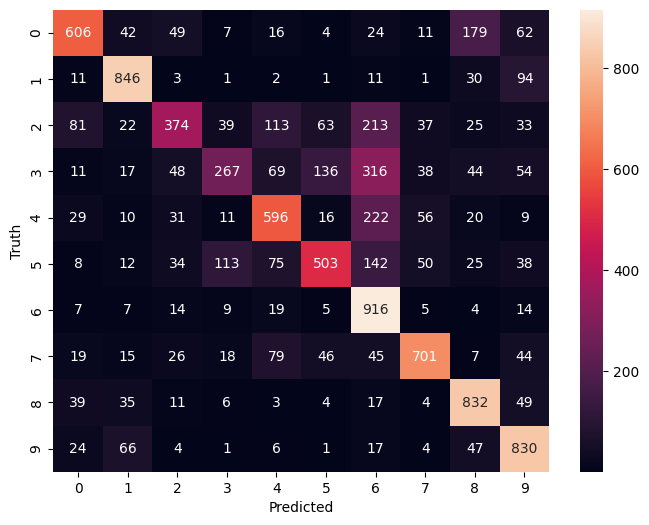

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dog-vs-cats')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datgen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datgen.flow_from_directory(
    '/content/dog-vs-cats',  # ✅ change to actual dataset location
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datgen.flow_from_directory(
    '/content/dog-vs-cats',  # ✅ same here
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2  # ✅ fixed import
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=5, validation_data=val_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 465s 2s/step - accuracy: 0.7775 - loss: 0.5674 - val_accuracy: 0.7985 - val_loss: 0.5103
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.7940 - loss: 0.5065 - val_accuracy: 0.7985 - val_loss: 0.5133
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.7924 - loss: 0.5011 - val_accuracy: 0.7985 - val_loss: 0.5123
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.7962 - loss: 0.4803 - val_accuracy: 0.7985 - val_loss: 0.5211
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.8018 - loss: 0.4589 - val_accuracy: 0.7985 - val_loss: 0.5217


In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 2188s 9s/step - accuracy: 0.7964 - loss: 0.4958 - val_accuracy: 0.7960 - val_loss: 0.5253
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 2317s 9s/step - accuracy: 0.8027 - loss: 0.4553 - val_accuracy: 0.7975 - val_loss: 0.5252
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 2269s 9s/step - accuracy: 0.8024 - loss: 0.4372 - val_accuracy: 0.7970 - val_loss: 0.5270


In [ ]:
# Save the model
model.save('mobilenet_cats_dogs.h5')  # ✅ .h5 extension

# Load the model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')  # ✅ no extra space


63/63 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step


/tmp/ipython-input-2223974584.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


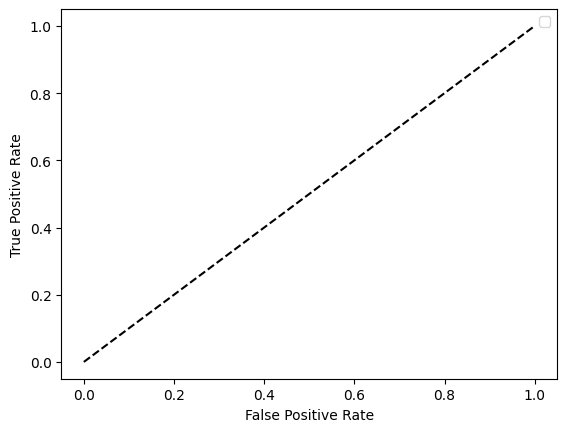

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,thresholds=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [85]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if predictions[0][0] > 0.5 else "Cat")


Saving download.jpg to download (5).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted class: Dog


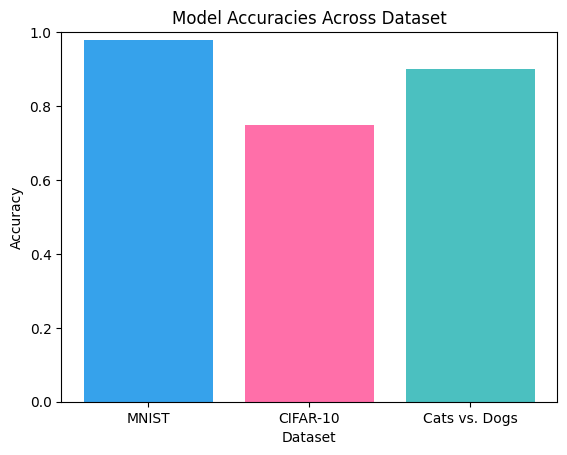

In [80]:
import matplotlib.pyplot as plt
datasets =['MNIST','CIFAR-10','Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB','#FF63A2EB','#4BC0C0'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Across Dataset')
plt.ylim(0,1)
plt.show()